***Project description:***

Prepare a prototype of a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry.
The model should predict the amount of gold recovered from gold ore. You have the data on extraction and purification.
The model will help to optimize the production and eliminate unprofitable parameters.

In [1]:
#We will upload the libraries we need.
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from joblib import dump
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [2]:
#Let's load our data sets.
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


**1. Prepare the data:**

In [6]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])
df['date'] = pd.to_datetime(df['date'])

In [7]:
#1.2.Let's check if the recovery is calculated correctly.
#Using the training set, calculate recovery for the rougher.output.recovery feature. 
#We will start by writing a function for calculating recovery.
def recovery(c,f,t):
    recovery = ((c*(f-t))/ (f*(c-t)))*100
    return recovery

In [8]:
#We will look for missing values:
df_train.isnull().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [9]:
df_train.dropna(inplace=True)

In [10]:
c= df_train['rougher.output.concentrate_au']
f= df_train['rougher.input.feed_au']
t= df_train['rougher.output.tail_au']
df_train['test_recovery'] = recovery(c,f,t)
df_train['test_recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: test_recovery, Length: 11017, dtype: float64

In [11]:
c= df['rougher.output.concentrate_au']
f= df['rougher.input.feed_au']
t= df['rougher.output.tail_au']
df['test_recovery'] = recovery(c,f,t)
df['test_recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
22711    89.574376
22712    87.724007
22713    88.890579
22714    89.858126
22715    89.514960
Name: test_recovery, Length: 22716, dtype: float64

In [12]:
#We will now check the MAE of our results against the calculation of the data set.
mean_absolute_error(df_train['test_recovery'], df_train['rougher.output.recovery'])

9.460144184559453e-15

Their recovery calculation is almost exactly the same as our calculation, we can continue.

In [13]:
#Their recovery calculation is almost exactly the same as our calculation, we can continue.
df_train.isnull().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
test_recovery                                 0
Length: 88, dtype: int64

In [14]:
df_test.dropna(inplace=True)
df_test.isnull().sum()/len(df_train)

date                                          0.0
primary_cleaner.input.sulfate                 0.0
primary_cleaner.input.depressant              0.0
primary_cleaner.input.feed_size               0.0
primary_cleaner.input.xanthate                0.0
primary_cleaner.state.floatbank8_a_air        0.0
primary_cleaner.state.floatbank8_a_level      0.0
primary_cleaner.state.floatbank8_b_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_c_level      0.0
primary_cleaner.state.floatbank8_d_air        0.0
primary_cleaner.state.floatbank8_d_level      0.0
rougher.input.feed_ag                         0.0
rougher.input.feed_pb                         0.0
rougher.input.feed_rate                       0.0
rougher.input.feed_size                       0.0
rougher.input.feed_sol                        0.0
rougher.input.feed_au                         0.0
rougher.input.floatbank10_sulfate             0.0


In [15]:
#Let's check if there are different parameters between the training data set and the test data set.
ex_col=set(df_train) - set(df_test)
ex_col

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

What all these columns have in common is that they are all results of calculations or output of a particular stage.
In our test data set we only have data on input, so it is more convenient to work that the two data sets are coordinated.

In [16]:
#We will delete all the columns that are not common to the two data sets,
#so that the model training will be on the same types of columns.
df_train.drop(columns=ex_col, inplace=True)

In [17]:
#We will check duplicates:
df_train.duplicated().sum()

0

In [18]:
df_test.duplicated().sum()

0

In [19]:
df.duplicated().sum()

0

Steps done so far:

1.Load the data set.

2.Changing the date columns.

3.Search for missing values - found and deleted.

4.Check the MAE calculation of the data set - found to be correct.

5.Duplicate Search - Not Found.

Our database is ready.

***2. Analyze the data***

In [20]:
df_train_n = pd.read_csv('/datasets/gold_recovery_train.csv')
targets = ['final.output.recovery', 'rougher.output.recovery']
df_train_n.dropna(subset=targets, inplace=True)
df_train_n.fillna(method='ffill', inplace=True)

/tmp/ipykernel_31/563922278.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,1,i+1)


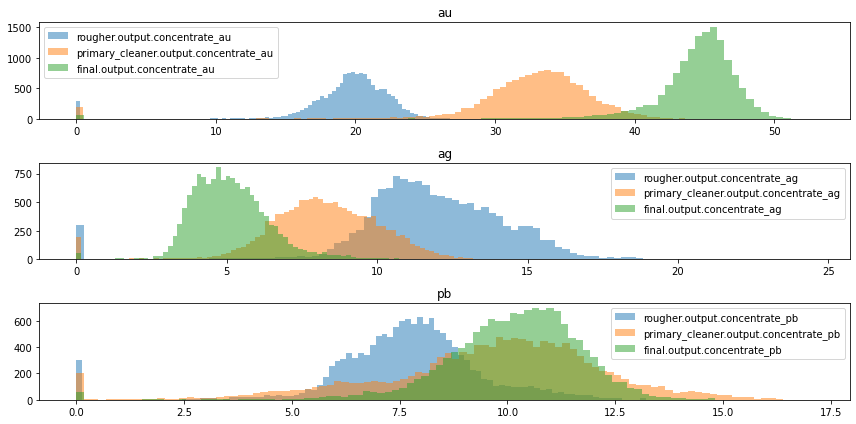

In [21]:
#2.1. Take note of how the concentrations of metals (Au, Ag, Pb)
#change depending on the purification stage.

metals = ['au', 'ag', 'pb']
columns = ['rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']

fig = plt.figure(figsize = (12,6))
for i,metal in enumerate(metals):
    for col in columns:
        plt.subplot(3,1,i+1)
        plt.hist(df_train_n[col+'_'+metal],bins=100,label=col+'_'+metal,alpha=0.5);
    plt.title(metal)  
    
    plt.legend()
plt.tight_layout()
plt.show()

Findings:

1.As the cleaning stages progress, the concentration of au increases.

2.As the cleaning stages progress, the ag concentration decreases.

3.The pb rises after the first stage, but remains almost the same between the second and third stages.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Ok, makes sense!
    

</div>

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


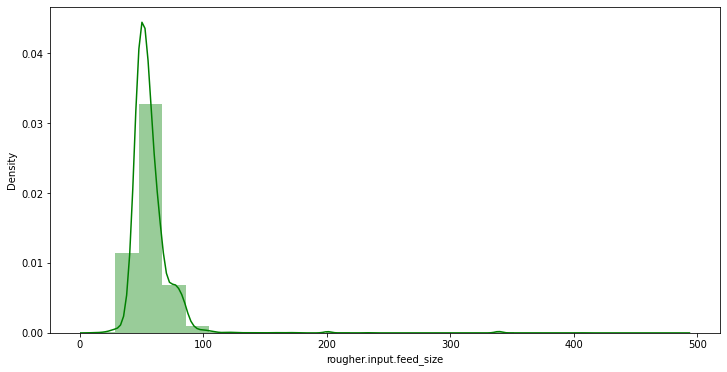

In [22]:
#2.2. Compare the feed particle size distributions in the training set and in the test set.
#If the distributions vary significantly, the model evaluation will be incorrect.
#Plot Data
fig, ax = plt.subplots(figsize = (12,6))
sns.distplot(df_train['rougher.input.feed_size'], bins=25, color="g", ax=ax)
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


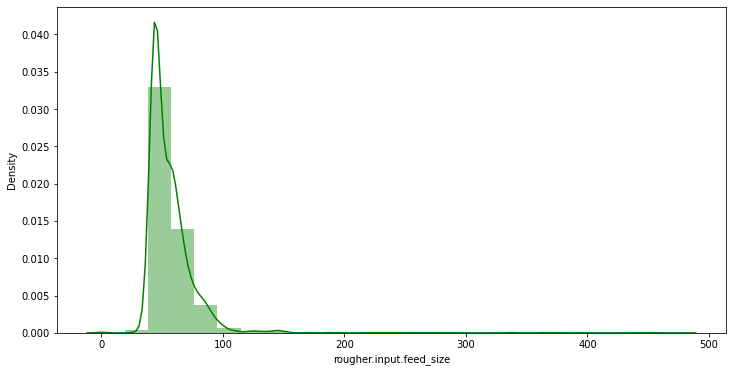

In [23]:
#Plot Data
fig, ax = plt.subplots(figsize = (12,6))
sns.distplot(df_test['rougher.input.feed_size'], bins=25, color="g", ax=ax)
plt.show()

The distribution of data sets is almost identical.

2.3. Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, 
and final concentrate. Do you notice any abnormal values in the total distribution?If you do,
is it worth removing such values from both samples? Describe the findings and eliminate anomalies.

In task 2.1 we can see in the graph that there are a number of values ​​that are around 0, these are the exceptions in our data set and we will now remove them.

In [24]:
metals = ['au', 'ag', 'pb']
columns = ['rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']

for i,metal in enumerate(metals):
    for col in columns:
        df_train_n[df_train_n[col+'_'+metal]<0.01]=np.nan
        
        
for col in ['final.output.recovery', 'rougher.output.recovery']:
    df_train_n[df_train_n[col]<0.01]=np.nan
    
df_train_n.dropna(subset=['final.output.recovery', 'rougher.output.recovery'], inplace=True)    

In [25]:
df_train_n.shape

(13596, 87)

In [26]:
df_test.shape

(5383, 53)

In [27]:
#Test
df_test = df_test.merge(df[['date', 'final.output.recovery', 'rougher.output.recovery']], 
                       how='left', on='date')
for col in ['final.output.recovery', 'rougher.output.recovery']:
    df_test[df_test[col]<0.01]=np.nan
    
df_test.dropna(subset=['final.output.recovery', 'rougher.output.recovery'], inplace=True)

In [28]:
df_test.shape

(5105, 55)

Findings:

The exceptions were deleted from both data sets.

2559 entries were deleted from the training data set.

278 entries were deleted from the test data set.

**3.Build the model**

In [29]:
ex_col2=set(df_train_n) - set(df_test)
df_train_n.drop(columns=ex_col2, inplace=True)

In [30]:
targets = ['final.output.recovery', 'rougher.output.recovery']
targets_train, targets_test = df_train_n[targets].values, df_test[targets].values

In [31]:
feature_train = df_train_n.drop(['final.output.recovery', 'rougher.output.recovery', 'date'], axis=1)
feature_test = df_test.drop(['final.output.recovery', 'rougher.output.recovery', 'date'], axis=1)

In [32]:
feature_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5105 entries, 0 to 5382
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5105 non-null   float64
 1   primary_cleaner.input.depressant            5105 non-null   float64
 2   primary_cleaner.input.feed_size             5105 non-null   float64
 3   primary_cleaner.input.xanthate              5105 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5105 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5105 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5105 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5105 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5105 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5105 non-null   float64
 10  primary_clea

In [33]:
#3.1. Write a function to calculate the final sMAPE value.
def smape(y_true, y_pred):
    return (np.abs(y_true-y_pred)/((np.abs(y_true)+np.abs(y_pred))/2)).mean()

In [34]:
def smape_final(y_true, y_pred):
    smape_out_rougher = smape(y_true[:, 0], y_pred[:, 0])
    smape_out_final = smape(y_true[:, 1], y_pred[:, 1])
    return 0.25*smape_out_rougher + 0.75*smape_out_final

In [35]:
#3.2. Train different models. Evaluate them using cross-validation.
model = LinearRegression()
sampe_score = make_scorer(smape_final, greater_is_better=False)
scores = cross_val_score(model, feature_train, targets_train, cv=5, scoring=sampe_score).mean()
print('Mean smape: {:0.3f}.folds: {}'.format(scores.mean(), scores))

Mean smape: -0.082.folds: -0.08205558252832659


In [40]:
best_model = None
best_score = 0
best_est = 0
best_depth = 0
for est in range(1, 10):
    for depth in range (1, 10):
        model = RandomForestRegressor(n_estimators = est, random_state = 12345,max_depth=depth)
        sampe_score = make_scorer(smape_final, greater_is_better=False)
        scores = cross_val_score(model, feature_train, targets_train, cv=5, scoring=sampe_score).mean()
        
        if scores > best_score:
            best_model = model
            best_score = scores
            best_est = est
            best_depth = depth

print('Mean smape: {:0.3f}.folds: {}'.format(best_score, scores), "n_estimators:", best_est, "best_depth:", depth)

Mean smape: 0.000.folds: -0.07907398048323619 n_estimators: 0 best_depth: 9


In [37]:
#We got a better result in the linear regression, so we will continue with it.
ir = LinearRegression()
ir.fit(feature_train, targets_train)
pred_ir = ir.predict(feature_test)

In [38]:
smape_final(targets_test, pred_ir)

0.05631310793860905

In [39]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor().fit(feature_train, targets_train)
pred_dummy = dummy.predict(feature_test)
smape_final(targets_test, pred_dummy)

0.060860195042920694

**Findings and conclusion:**

We tested two models, a random forest (by some hyperparameters, the best of them give us score of -0.079) and a linear regression (score of -0.082), we found that while the random forest is slightly more accurate, but since it is a relatively small difference we continued with the linear regression as the random forest takes much longer to activate (it should be noted here that the comparison score between the models is better when it is lower).


We then trained the model, and we got a score of 0.0536 in the final smape. We created a constant model for comparison (a model that will always give us the median or average) and it gave us a score of 0.060.

The model is ready.